In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
autism = pd.read_csv('train.csv')

In [7]:
autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [8]:
autism.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

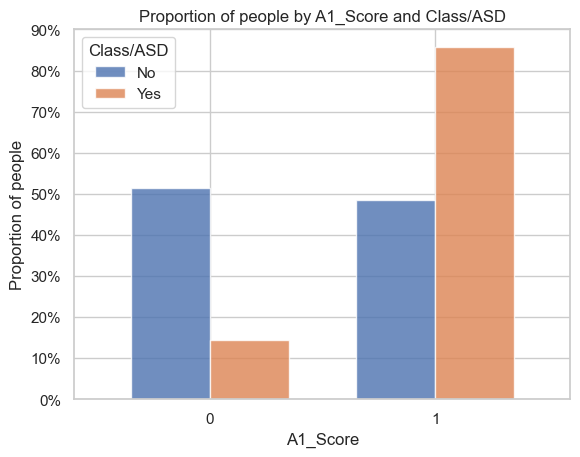

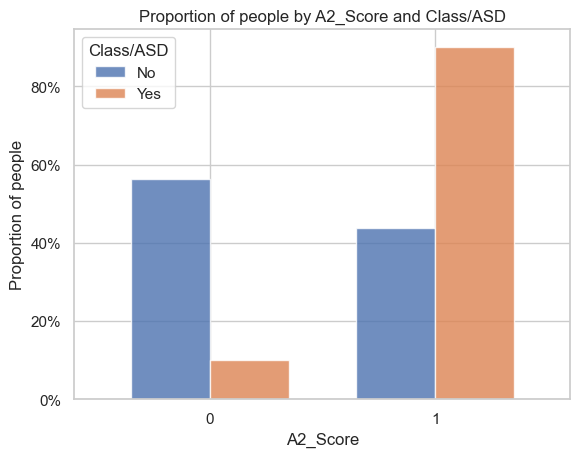

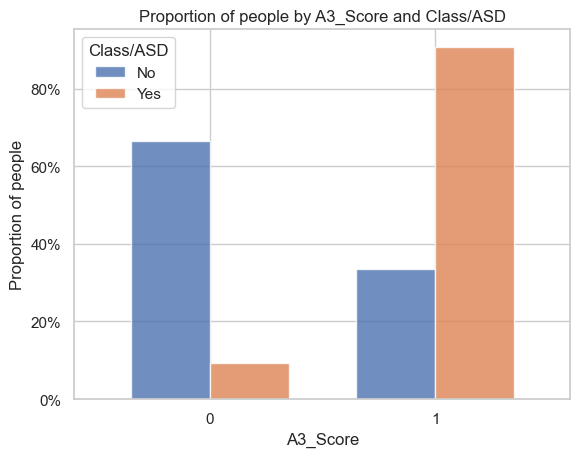

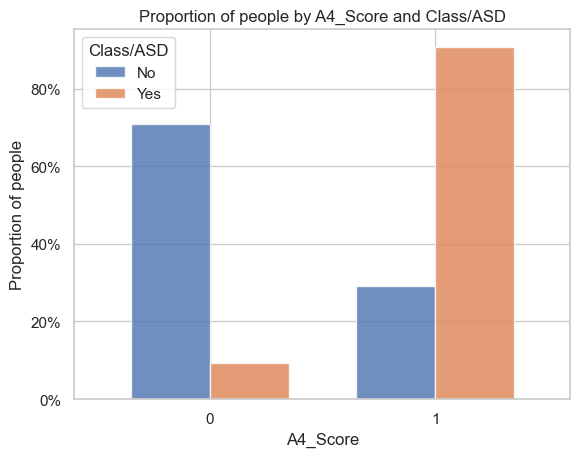

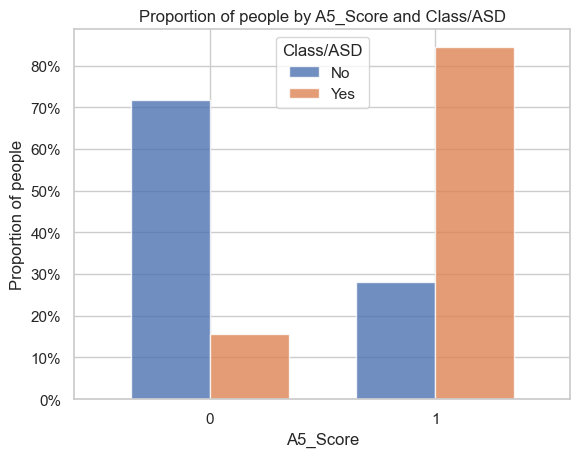

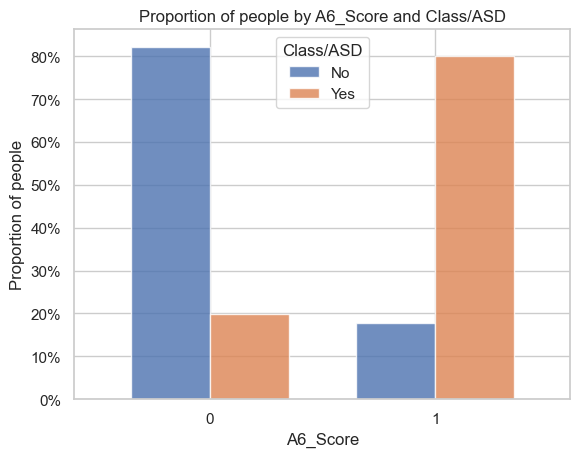

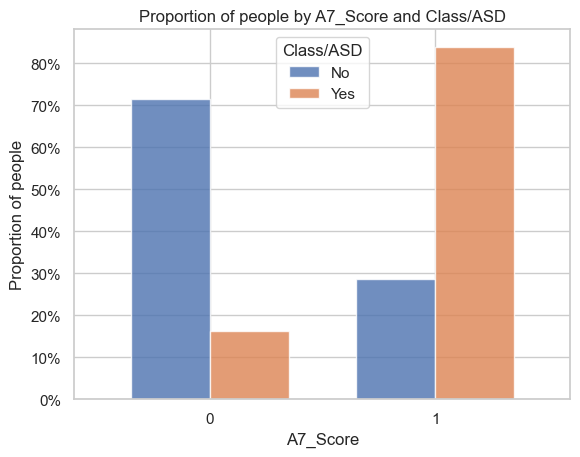

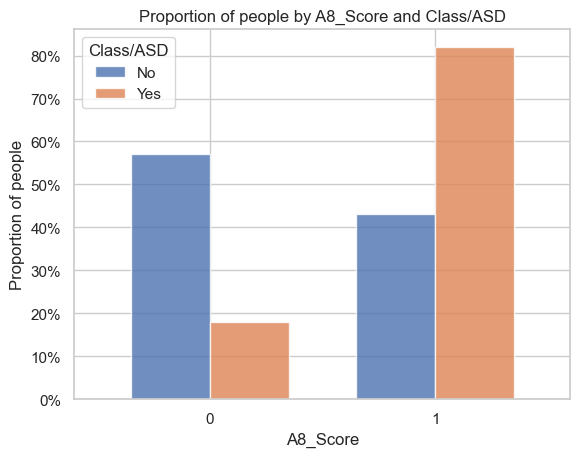

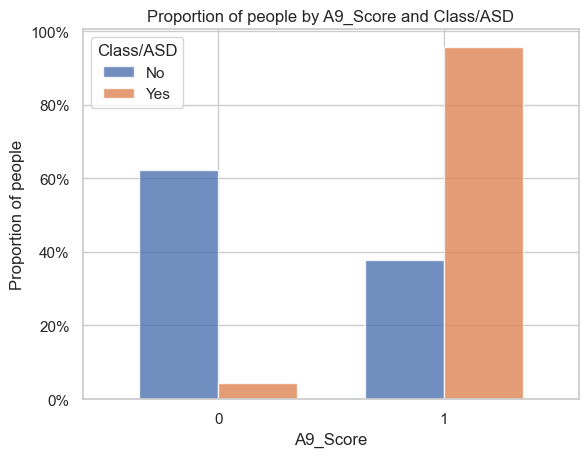

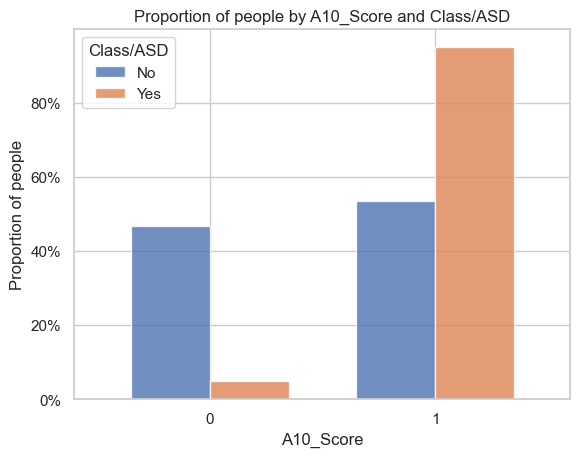

In [33]:
sns.set_theme(style="whitegrid")
lists = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']
for i in lists:

    proportions = autism.groupby([i, 'Class/ASD']).size().reset_index(name='counts')
    proportions['proportions'] = proportions.groupby('Class/ASD')['counts'].apply(lambda x: x / x.sum())
    
    pivoted = proportions.pivot(index=i, columns='Class/ASD', values='proportions')

    ax = pivoted.plot.bar(width=0.7, alpha=0.8)
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion of people')
    ax.set_title('Proportion of people by ' + i + ' and Class/ASD')
    ax.legend(['No','Yes'],title='Class/ASD')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

For every question from A1 through A10 there was a higher proportion of people who replied yes to Class/ASD that answered yes to each question which suggests that the questions might be a good basis for finding the propbability that someone has ASD. 

<AxesSubplot:xlabel='age', ylabel='Density'>

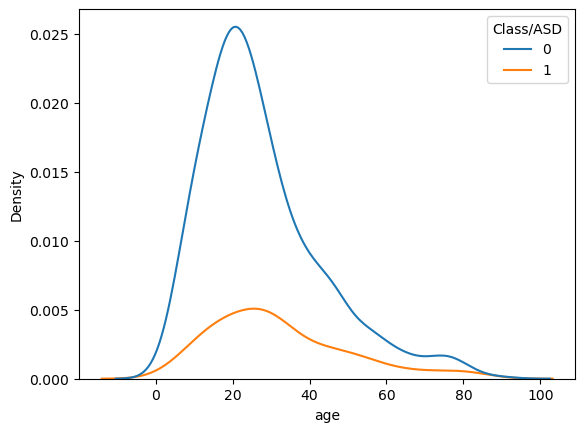

In [11]:
sns.kdeplot(data=autism, x="age", hue="Class/ASD")

There are significantly less people who reported having autism but the distributions in age seem to be the same regardless of their category. 

Male total = 530
Female total = 270


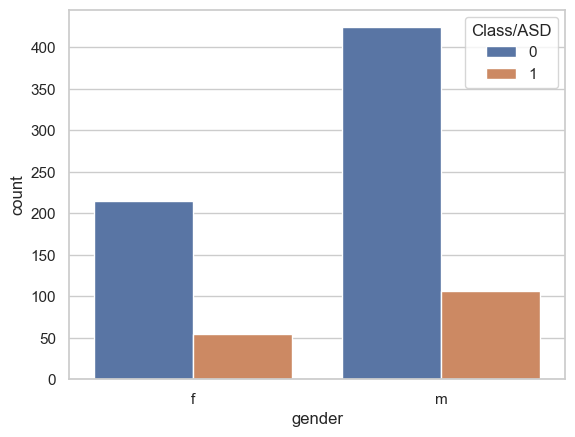

In [32]:
sns.set_theme(style="whitegrid")
sns.countplot(data=autism, x='gender', hue='Class/ASD')
print('Male total = ' + str(autism[autism['gender'] == 'm'].value_counts().sum()))
print('Female total = ' + str(autism[autism['gender'] == 'f'].value_counts().sum()))


There were about twice as many male rows but the proportion of those with to those without ASD appears to be the same in this sample which suggests that gender isn't an important column for our model. 

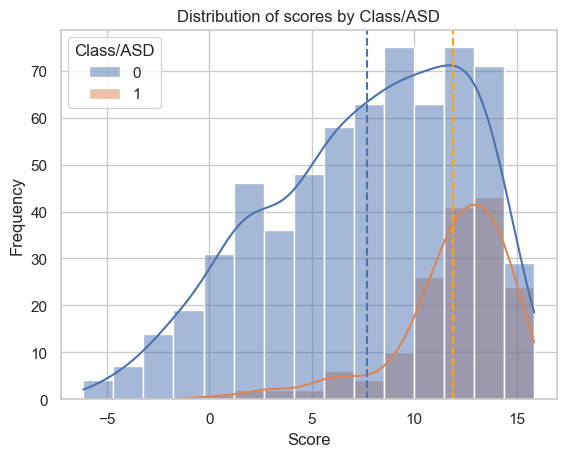

In [31]:
sns.histplot(data=autism, x="result", hue="Class/ASD", kde=True)

# add title and axis labels
plt.title("Distribution of scores by Class/ASD")
plt.xlabel("Score")
plt.ylabel("Frequency")

avg_0 = autism[autism["Class/ASD"] == 0]["result"].mean()
avg_1 = autism[autism["Class/ASD"] == 1]["result"].mean()

plt.axvline(x=avg_0, color="b", linestyle="--", label="Class/ASD 0 Avg")
plt.axvline(x=avg_1, color="orange", linestyle="--", label="Class/ASD 1 Avg")

People who reported having autism tended to have higher result scores which makes sense from looking at each of the A1 through A10 questions earlier. The averages are shown with the dashed lines which support that observation. 

total for jaundice at birth = 185
total for jaundice absent at birth = 615


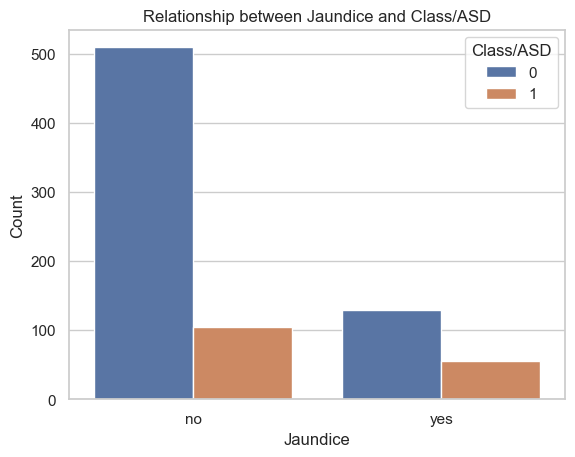

In [36]:
sns.set_theme(style="whitegrid")
sns.countplot(data=autism, x="jaundice", hue="Class/ASD")

plt.title("Relationship between Jaundice and Class/ASD")
plt.xlabel("Jaundice")
plt.ylabel("Count")

print('total for jaundice at birth = ' + str(autism[autism['jaundice'] == 'yes'].value_counts().sum()))
print('total for jaundice absent at birth = ' + str(autism[autism['jaundice'] == 'no'].value_counts().sum()))

plt.show()

Of the people that do have autism, close to half had jaudice at birth. While only a fifth of people who don't have autism had jaundice. 

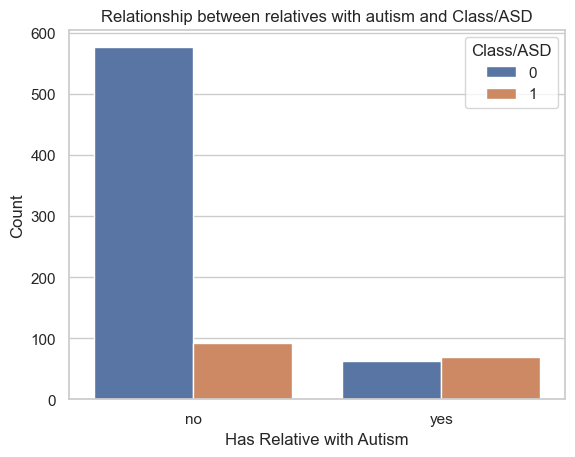

In [38]:
sns.set_theme(style="whitegrid")
sns.countplot(data=autism, x="austim", hue="Class/ASD")

plt.title("Relationship between relatives with autism and Class/ASD")
plt.xlabel("Has Relative with Autism")
plt.ylabel("Count")

plt.show()

People with autism were more likely to report having a relative with autism than not. While the opposite is true for the sample that doesn't have autism. 